
| Nome        | nUSP           | 
| ------------- |:-------------:|
| Pedro Raul Taborga da Costa | 4537076 |
| Flavio de Figueiroa Teixeira Silva | 11270722|


## Tarefas

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [1]:
import pandas as pd
dt_folder = "../../datasets/"
df_ren = pd.read_csv(dt_folder+"creditcardfraud_renamed.zip")
df_norm = pd.read_csv(dt_folder+"creditcardfraud_normalized.zip")

In [73]:
from sklearn.model_selection import train_test_split

# Reduzindo o dataset pra lidar com pc velho.
reduced = df_ren.iloc[0:10000,:]
# Usando todos os atributos, mas é possível só selecionar os com maiores correlação
X, y = reduced.iloc[:,3:],reduced.iloc[:,2] 
# Criando o treino e teste, sendo X a matriz sem o atributo Classe e Y tendo somente Classe
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [76]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2985    0]
 [   2   13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2985
           1       1.00      0.87      0.93        15

    accuracy                           1.00      3000
   macro avg       1.00      0.93      0.96      3000
weighted avg       1.00      1.00      1.00      3000



In [90]:
import numpy as np
error = []

# Montando a lista de erros pra os K vizinhos ímpares entre 1 e 15
for i in range(1, 17, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Erro Médio')

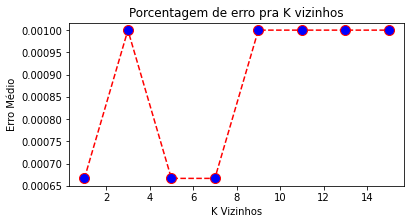

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(range(1, 17, 2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Porcentagem de erro pra K vizinhos')
plt.xlabel('K Vizinhos')
plt.ylabel('Erro Médio')